## CS1P Lab Exam 1 
### Exam problem

<div class="alert alert-box alert-danger">
    
You must not import *any* libraries in this code except those already imported for you. 
You may only use concepts and programming constructs from the CS1P course.

</div>

In [1]:
# these are the only permitted imports
from show_curve import show_curve, show_many_curves
import math, random 

## Problem

You are asked to make predictions about the weather. You have data recorded in text file (or text files). You are asked to load the data, and create a model that will make simple predictions. 




## 1. Load the data [12 marks]


The data you will load is a measurement of environmental data recorded daily over several months in New York. 

This data includes both an air temperature $T_a$ (in Farenheit) and a wind speed $v$ (in MPH). There is a standard formula to convert data in these units to **wind chill index** (the subjective sensation of temperature) $T_{wc}$:

$$ T_{\mathrm {wc} }=35.74+0.6215T_{\mathrm {a} }-35.75v^{0.16}+0.4275T_{\mathrm {a} }v^{0.16}$$

* A temperature of 0F and a wind speed of 0 MPH has wind chill exactly 35.74
* A temperature of -50F and a wind speed of 90 MPH has wind chill between -100 and -200
* At -50F, *any* increase in wind speed decreases the wind chill index

The following code implements a function to compute this *but it is incorrectly implemented*. Correct it **and** test that your version works correctly.


In [88]:
def wind_chill(t_a, v):
    v_pow = v ** 0.16
    t_w_c = 35.74 + 0.6215 * t_a - 35.75 * v_pow + 0.4275 * t_a * v_pow
    return t_w_c

assert wind_chill(0,0) == 35.74

inter = wind_chill(-50,90)
assert inter <= -100 and inter >= -200

for i in range(100):
    speed = random.randint(0,10)
    add = random.randint(0,10)
    assert wind_chill(-50, speed) >= wind_chill(-50, speed + add)

To complete part 1, you need to load the data (below), and apply the corrected code that computes the wind_chill to return a sequence of `[day_number, wind_chill]` pairs.

### Data loading
---

The data you will load is a measurement of environmental data recorded daily over several months in New York. The data you have is formatted as *roughly* as follows:

    day;wind;temp
    day;wind;temp
    day;wind;temp
              
and so on.
         
That is,

* each line is a delimiter separated set of three numeric values. 
* these are day, wind speed and temperature

**However**; the delimiters are not consistently `;`. Any line might instead use  `,` (comma) `/` (slash) or ` ` space as delimter. Each line always uses the same *delimiters* throughout. The temperatures are given in Rankine (R).

    Farenheit = Rankine - 459.67
    
Unfortunately, the columns for `wind` and `temp` are also randomly swapped around on each row. However, `temp` is always greater than 200 and `wind` is always less than 200.

The data is in a file `data/ny_data_delim.txt`. The data starts:

    1;30.2;492.67
    2 487.67 29.0
    3;19.8;485.67
    4/22.0/497.67
    5/503.67/16.4
    6;15.2;493.67
    7 494.67 27.8
    8/17.4/500.67
    
The first row tells you that the temperature on day 1 was 492.67 Rankine and the wind speed was 30.2 MPH. On Day 2, the temperature was 487.67 Rankine and the wind speed was 29.0 MPH. Day is *always* the first value and is always a positive integer. You must convert Rankine to Farenheit before computing wind chill.



* There are exactly 153 sets of measurements in this data.
* The wind speed is never negative.
* The air temperature is never > 60 degrees Farenheit and the wind chill index is never > 50.
* The day numbers are positive and have no fractional part.
* The first day has windchill *approximately* 18.915
* The last day has windchill *approximately* 19.437

You need to load the data, using the *relevant* parts of it, apply this formula to return a sequence of `[day_number, wind_chill]` pairs. These should be returned in order, with the smallest `day_number` first.

You must define:
* `load_data(fname)` must take a filename and return all of the data loaded from `fname`.
* `parse_line(s)` that must parse *one line* of the file.

You may define other helper functions as needed.

In [95]:
## Your code here
def parse_line(s):
    if '/' in s:
        dpoint = s.split('/')
    elif ';' in s:
        dpoint = s.split(';')
    elif ',' in s:
        dpoint = s.split(',')
    elif ' ' in s:
        dpoint = s.split(' ')
    day = int(dpoint[0])
    dpoint[2] = dpoint[2].strip()
    point1 = float(dpoint[1].strip())
    point2 = float(dpoint[2].strip())
    temp_f = float(max(point1, point2)) - 459.67
    wind_v = float(min(point1, point2))
    assert wind_v > 0
    assert temp_f <= 60
    chill = wind_chill(temp_f, wind_v)
    #print(day, temp_f, wind_v, chill)
    return day, chill



def load_data(fname):
    with open(fname) as f:
        lines = f.readlines()
    #print(lines)
    seq = []
    for i in lines:
        day, chill = parse_line(i)
        seq.append([day, chill])
    return seq

## 1.T: Validate the data loading [8 marks]

Write tests that will validate that this code works correctly using `assert`.  You may assume that the data will always be in the format specified above.

In [96]:
assert "load_data" in globals(), "You did not define load_data"
assert "parse_line" in globals(), "You did not define parse_line"

## Your tests here

data = load_data('data/ny_data_delim.txt')
assert len(data) == 153
print(data)

for i in data:
    day = i[0]
    chill = i[1]
    assert type(day) == type(1)
    assert chill <= 50

print(data[0][1])
    
assert round(data[0][1], 3) == 18.915
assert round(data[-1][1], 3) == 19.437

[[1, 18.915154942706604], [2, 12.385626838457355], [3, 12.178107606652375], [4, 27.372940582055623], [5, 36.58340367300052], [6, 24.081257195419756], [7, 22.10503689525429], [8, 32.441165407235005], [9, 35.45852290216325], [10, 16.708029707804368], [11, 9.1803714388883], [12, 17.209906929116375], [13, 21.009859454443305], [14, 19.129046649219916], [15, 33.436347182330906], [16, 24.72792208411446], [17, 22.34087716662223], [18, 38.14539857894074], [19, 19.43788508823212], [20, 26.587912419265024], [21, 30.607057629328736], [22, 16.591009253351057], [23, 27.927627489286262], [24, 28.927431494048346], [25, 36.687140481568704], [26, 34.339183209639145], [27, 32.698465059584024], [28, 21.02356630113701], [29, 4.847645918758397], [30, 1.8125601961646485], [31, 6.684533879616097], [32, 4.564763536042054], [33, 10.511331579010196], [34, 23.706242593871274], [35, -3.184516293756495], [36, -4.879999041995308], [37, 6.905976967851602], [38, -0.20638898115968196], [39, -8.536180650755629], [40, -7

AssertionError: 

## 2. Fit a curve [10 marks]

You need to fit a split line curve to this data, i.e. find the curve that comes close to these pairs of values. 

The equation of a split line curve (a curve with different gradients on each side of a point $x_t$) is: $$y=\begin{cases}
m_1(x - x_t) + c  & \text{if}\  x<x_t\\
m_2(x - x_t) + c  & \text{if}\ x\geq x_t\\
\end{cases}$$

There are parameters `m1`, `m2`, `c`, `xt`  which we can pack into a  list `[m1,m2,c,xt]`.

### Curve function
Define a function `curve_fn(parameters, x)` that evaluates the curve given a *list of parameters defining the curve shape* (as described above), and an input point `x`. That is, `curve_fn` returns the value `y` given `parameters` and `x`.

In [42]:
## Your solution here
def curve_fn(parameters, x):
    m1 = parameters[0]
    m2 = parameters[1]
    c = parameters[2]
    xt = parameters[3]
    if x < xt:
        y = m1 * (x - xt) + c
    else:
        y = m2 * (x - xt) + c
    return y

### Fitting
To fit this curve we need: 
1. a function to measure how bad a proposed curve fit -- that is the total error for some parameters -- is to some data consisting of x,y measurements;
1. a procedure for incrementally adjusting `parameters` so that it is a better fit to some data.

### Error
The badness of a fit (or *error*) for a choice of `parameters` can be measured for any specific data point `x, y` and computing: `error = (y - curve_fn(parameters, x))**2` and the overall error can be computed by summing this across all data points.

### Adjustment
To adjust the fit, implement the following the same procedure as the practice problem, with the modified error computation defined above:
* randomly guess an initial value for `parameters`
* then, repeat N times
    * adjust each element of `parameters` by a small random amount
    * compute the error over all data points with this adjusted guess
    * if the result is better than the previous best guess (error is smaller)
        * make the new adjusted parameters the current best guess 
        * otherwise, reject (i.e. undo) the small random change to parameters

An initial random guess can be produced using `random.uniform(a,b)` which generates a random number between `a` and `b`.  The function `random.gauss(x, s)` returns a random number close to `x` whose range is determined by `s` -- larger `s` makes bigger "jumps".

* **initial range** assume that `m1` and `m2` must start between [-10, 10], `c` must start between `[-50,50]`, and `xt` must be between `[0,365]`.

* **guess step** assume that you will adjust estimates of `m1` and `m2` by 0.1; `c` by 0.5; and `xt` by 1.0.
    

    
Write a function `fit_curve(curve_fn, initial_range, guess_step, data, N=10000)` which will fit a curve to data, **taking `curve_fn`** as a parameter, along with the `initial_range` and `guess_step` as lists defined using the settings given above; and `data` in the format returned by `load_data()`, and return the parameters for the fit using `N` update steps.  

* If your function works, the error should go down as N increases. 
* You may wish to separately implement an error function. The computed error is always 0 or positive.
* The return value should be a list of parameters the same size as `curve_fn()` expects

**Do not call random.seed() in your fit_curve().**

In [97]:
## Your code here
def get_error(fn, data, parameters):
    error = 0
    for i in data:
        x = i[0] # Day
        y = i[1] # Wind chill
        error = (y - fn(parameters, x))**2
    return error
    
def fit_curve(curve_fn, initial_range, guess_step, data, N = 10_000):
    par_n = len(initial_range)
    parameters = []
    
    for i in range(par_n):
        parameters.append(random.uniform(initial_range[i][0], initial_range[i][1]))
    
    old_err = get_error(curve_fn, data, parameters)
    
    for i in range(N):
        
        parameters_temp = []
        for i in range(par_n):
            parameters_temp.append(random.gauss(parameters[i], guess_step[i]))
        
        new_err = get_error(curve_fn, data, parameters_temp)

        if new_err < old_err:

            parameters = parameters_temp.copy()
            old_err = new_err
            
    return parameters

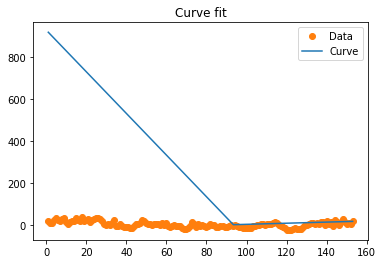

In [98]:
## To test your fit looks OK, fit the parameters, then call:
initial_range = [[-10, 10], [-10, 10], [-50,50], [0,365]]
guess_step = [0.1, 0.1, 0.5, 1.0]
data = load_data('data/ny_data_delim.txt')
parameters = fit_curve(curve_fn, initial_range, guess_step, data, N = 10_000)

show_curve(curve_fn, parameters, data)

## 2.T Validate the curve fitting [5 marks]

 Write tests to validate the functions you have written. You should test that the computed error gets smaller if N increases (this will only happen if you test large enough N). Call `random.seed(2019)` at the start of your tests to make sure results are consistent.

In [7]:
random.seed(2019)

In [68]:
## Your tests here
random.seed(2019)

parameters_bad = fit_curve(curve_fn, initial_range, guess_step, data, N = 10)
for i in range(len(parameters_bad)):
    assert parameters_bad[i] <= initial_range[i][1] and parameters_bad[i] >= initial_range[i][0]

parameters_good = fit_curve(curve_fn, initial_range, guess_step, data, N = 10_000)

assert get_error(curve_fn, data, parameters_bad) > get_error(curve_fn, data, parameters_good)

## 3. Curve fitting variant [8 marks]

In the following part, you *may* find the following functions to be useful:
    
* `random.choice(l)` returns a random element of a sequence `l`
* `random.shuffle(l)` shuffles (randomly reorders) a list *in-place* (i.e. mutates the list; and returns `None`)
* `random.randint(a,b)` returns a random number between `a` and `b`

Write a helper function `fit_fn(data, N)` which fits a curve to the data **using the `curve_fn`, and a fixed `initial_range`, and `guess_step` defined given the information above** to a given set of `data` and an iteration count `N` and returns the fitted `parameters`.

In [75]:
## Your solution here
def fit_fn(data, N):
    parameters = fit_curve(curve_fn, initial_range, guess_step, data, N)
    return parameters

Then, write a function `variant_fits` which takes `fit_fn` *as an argument* and implements the following algorithm. You must implement the following algorithm carefully and match the function call signature defined below:


Take as inputs (i.e. parameters):
* `n` (an integer >0)

* for `n` iterations
    * fit a curve to all data points **excluding exactly one randomly chosen data point** 
        * (the excluded data point should be different on each iteration)
    

Your function should have the call signature: `def variant_fits(fit_fn, data, n, N)`

* you should always get a number of fits = n

In [92]:
## Your code here
def variant_fits(fit_fn, data, n, N):
    fits = []
    data_temp = data.copy()
    random.shuffle(data_temp)
    
    for i in range(n):
        data_temp = data_temp.remove(random.choice(data_temp))
        parameters = fit_fn(data, N)
        fits.append(parameters)
        
    return fits

Help on method_descriptor:

remove(self, value, /)
    Remove first occurrence of value.
    
    Raises ValueError if the value is not present.



## 3.T Test the curve fitting variant [3 marks]

In [84]:
## Your tests here
test = variant_fits(fit_fn, data, n = 10, N = 10)
assert len(test) == 10
assert type(test) == type([])
assert len(test[0]) == 4
for i in test:
    assert type(i[0]) == type(0.0)
    assert type(i[1]) == type(0.0)
    assert type(i[2]) == type(0.0)
    assert type(i[3]) == type(0.0)

## 4. Apply variant curve fitting  [4 marks]
Use the function defined in part 3 on the data you loaded in Part 1. The pre-defined function `show_many_curves(curve_fn, data, fits)` takes:

* `curve_fn` a function that computes a curve given one element of `fits`
* `data` the data points
* `fits` a list of parameters lists representing a curve fit


Set `n=100`

The result should be lots of overlaid distinct curve segments across the whole dataset, which have some random variation but still fit the data reasonably well.

In [85]:
## Your code here
data = load_data('data/ny_data_delim.txt')
fits = variant_fits(fit_fn, data, n = 100, N = 10_000)
show_many_curves(curve_fn, data, fits)

['1;30.2;492.67\n', '2 487.67 29.0\n', '3;19.8;485.67\n', '4/22.0/497.67\n', '5/503.67/16.4\n', '6;15.2;493.67\n', '7 494.67 27.8\n', '8/17.4/500.67\n', '9/498.67/4.799999999999997\n', '10/27.8/490.67\n', '11 31.2 485.67\n', '12,25.6,490.67\n', '13/493.67/26.6\n', '14,23.2,491.67\n', '15,501.67,18.6\n', '16,495.67,22.0\n', '17 493.67 21.0\n', '18 8.200000000000003 502.67\n', '19/22.0/491.67\n', '20;25.6;497.67\n', '21/25.6/500.67\n', '22;11.799999999999997;486.67\n', '23,25.6,498.67\n', '24;498.67;21.0\n', '25;502.67;11.799999999999997\n', '26/501.67/15.2\n', '27/502.67/29.0\n', '28,21.0,492.67\n', '29 478.67 15.2\n', '30;33.6;480.67\n', '31 483.67 30.2\n', '32;481.67;27.8\n', '33;25.6;485.67\n', '34 492.67 12.799999999999997\n', '35 475.67 26.6\n', '36/474.67/27.8\n', '37/480.67/16.4\n', '38/477.67/25.6\n', '39;31.2;472.67\n', '40;469.67;17.4\n', '41/472.67/22.0\n', '42/23.2/466.67\n', '43/26.6/467.67\n', '44/477.67/29.0\n', '45,479.67,17.4\n', '46,480.67,22.0\n', '47;482.67;15.2\n', 

IndexError: list assignment index out of range

<div class="alert alert-box alert-danger">

### REMEMBER TO SUBMIT THIS NOTEBOOK ON MOODLE BEFORE LEAVING THE EXAM. 
Submit *only* the `.ipynb` file
</div>

---
**variant** 1 **master** cs1p_lab_exam_template.ipynb **variants** exam_data_delim.ipynb exam_curve_split.ipynb exam_variant_jackknife.ipynb **date** Sun Dec  1 12:34:08 2019 